In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_biclusters
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from scipy.spatial.transform import Rotation as R

In [2]:
data = make_classification(n_samples=2000, n_features=2, n_redundant=0, random_state=42)

In [3]:
X = data[0]
y = data[1]

In [4]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

In [5]:
df.head()

,x1,x2,y
0,0.800062,-0.957489,1
1,1.187099,1.159787,1
2,0.154512,1.217520,0
3,0.179014,-0.852832,1
4,-0.735827,-0.245366,0


In [6]:
df.describe()

,x1,x2,y
count,2000.000000,2000.000000,2000.000000
mean,-0.006653,0.015299,0.500000
std,1.283737,1.288376,0.500125
min,-4.190223,-3.276826,0.000000
25%,-0.995116,-1.003917,0.000000
50%,0.084844,-0.214702,0.500000
75%,0.991161,1.034803,1.000000
max,3.466347,3.936006,1.000000


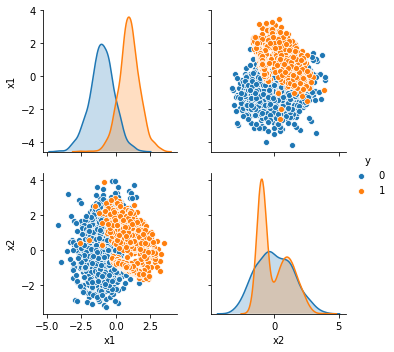

In [7]:
sns.pairplot(data=df, x_vars=['x1', 'x2'], y_vars=['x1', 'x2'], hue='y')

In [10]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [12]:
test.head()

,x1,x2,y
1860,2.179929,-0.478662,1
353,-0.480964,-0.956624,0
1333,0.758236,-0.850342,1
905,1.735049,1.701470,1
1289,-0.140032,1.590041,1


In [116]:
def rotate(vector, theta=90):
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)
    R = np.matrix([[c, -s], [s, c]])
    vector_p = vector @ R.T
    return vector_p

In [125]:
vector = np.array([2.1799,-0.47866])
rotate(vector)

matrix([[0.47866, 2.1799 ]])

In [122]:
test.head()

,x1,x2,y
1860,2.179929,-0.478662,1
353,-0.480964,-0.956624,0
1333,0.758236,-0.850342,1
905,1.735049,1.701470,1
1289,-0.140032,1.590041,1


In [135]:
rotate(test[['x1', 'x2']].head().values, theta=0)

matrix([[ 2.17992932, -0.47866247],
        [-0.4809644 , -0.95662389],
        [ 0.75823551, -0.85034164],
        [ 1.73504909,  1.70146982],
        [-0.1400324 ,  1.59004108]])

In [148]:
test_rot = pd.DataFrame(rotate(test[['x1', 'x2']].values, theta=45), columns=['x1', 'x2'])
test_rot['y'] = test['y'].values

In [149]:
test_rot.head()

,x1,x2,y
0,1.879908,1.202977,1
1,0.336342,-1.016528,0
2,1.137436,-0.065129,1
3,0.023744,2.429986,1
4,-1.223347,1.025311,1


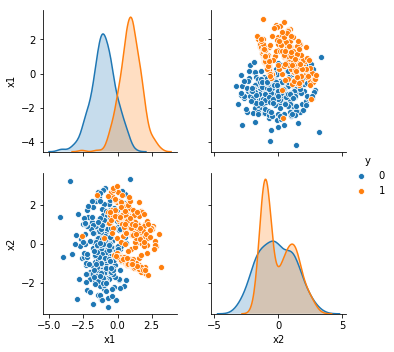

In [150]:
sns.pairplot(data=test, x_vars=['x1', 'x2'], y_vars=['x1', 'x2'], hue='y')

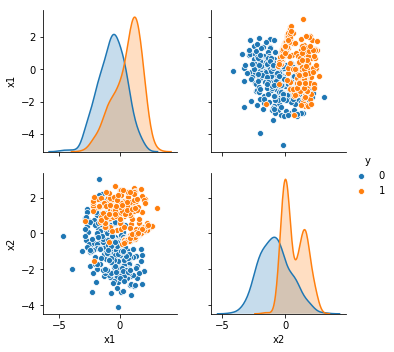

In [151]:
sns.pairplot(data=test_rot, x_vars=['x1', 'x2'], y_vars=['x1', 'x2'], hue='y')

In [152]:
from sklearn.svm import SVC

In [157]:
svc = SVC(probability=True, gamma='auto')

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report

In [162]:
svc_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', svc)
])

In [163]:
svc_pipe.fit(X=train[['x1', 'x2']], y=train['y'])

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

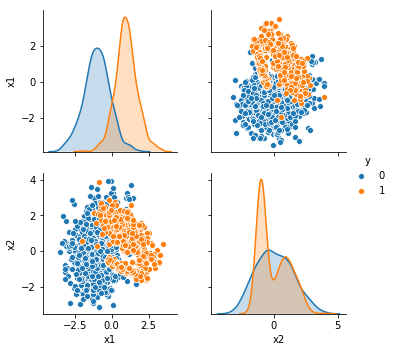

In [167]:
sns.pairplot(data=train, x_vars=['x1', 'x2'], y_vars=['x1', 'x2'], hue='y')

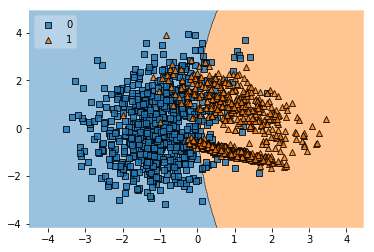

In [166]:
plot_decision_regions(train[['x1', 'x2']].values, train['y'].values, clf=svc_pipe, legend=2)

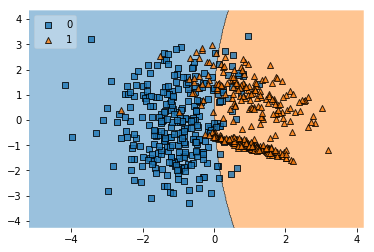

In [168]:
plot_decision_regions(test[['x1', 'x2']].values, test['y'].values, clf=svc_pipe, legend=2)

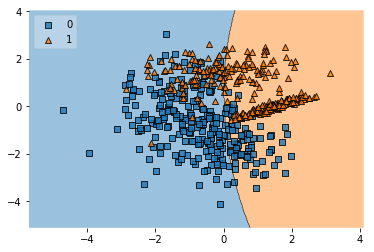

In [169]:
plot_decision_regions(test_rot[['x1', 'x2']].values, test_rot['y'].values, clf=svc_pipe, legend=2)

In [171]:
from scipy import stats

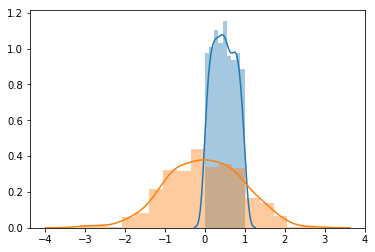

In [265]:
sns.distplot(a)
sns.distplot(c)


In [262]:
a = np.random.uniform(size=500)
b = np.random.uniform(size=500)
c = np.random.normal(size=500)

In [266]:
stats.ks_2samp(a, c)

Ks_2sampResult(statistic=0.51, pvalue=8.135471846849892e-58)

In [ ]:
# if p value high --> cannot reject 
# If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [189]:
results = {}
for angle in np.arange(0,90,1):
    #print(angle)
    test_rot = pd.DataFrame(rotate(test[['x1', 'x2']].values, theta=angle), columns=['x1', 'x2'])
    test_rot['y'] = test['y'].values
    results[angle] = svc_pipe.predict_proba(test_rot[['x1', 'x2']])[:,1]

In [230]:
test.describe()

,x1,x2,y
count,600.000000,600.000000,600.000000
mean,-0.000027,-0.039230,0.516667
std,1.294611,1.300826,0.500139
min,-4.190223,-3.276826,0.000000
25%,-1.013591,-1.041409,0.000000
50%,0.116754,-0.252145,1.000000
75%,0.999381,1.034268,1.000000
max,3.193521,3.348403,1.000000


In [231]:
def translate(vector, a = [0.1,0.1]):
    return vector + a

In [232]:
translate(np.array([0,0]))

array([0.1, 0.1])

In [238]:
test.head()

,x1,x2,y
1860,2.179929,-0.478662,1
353,-0.480964,-0.956624,0
1333,0.758236,-0.850342,1
905,1.735049,1.701470,1
1289,-0.140032,1.590041,1


In [239]:
test.apply(lambda x: translate(np.array([x.iloc[0], x.iloc[1]])), axis=1, result_type='expand').head()

,0,1
1860,2.279929,-0.378662
353,-0.380964,-0.856624
1333,0.858236,-0.750342
905,1.835049,1.801470
1289,-0.040032,1.690041


In [190]:
svc_pipe.classes_

array([0, 1])

In [226]:
ks = []
p = []
for key in list(results.keys()):
    ks.append(stats.ks_2samp(results[0], results[key])[0])
    p.append(stats.ks_2samp(results[0], results[key])[1])

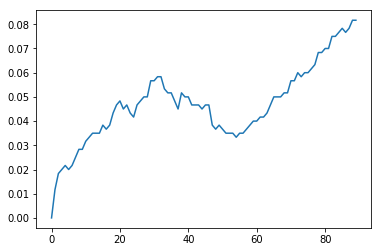

In [228]:
plt.plot(ks)

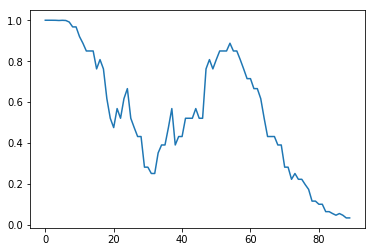

In [229]:
plt.plot(p)

In [254]:
results_translate = {}
for element in np.arange(0, 5, 0.1):
    a = np.array([element, element])
    test_trans = test.apply(lambda x: translate(np.array([x.iloc[0], x.iloc[1]]), a), axis=1, result_type='expand')
    test_trans.columns = ['x1', 'x2']
    test_trans['y'] = test['y'].values
    results_translate[element] = svc_pipe.predict_proba(test_trans[['x1', 'x2']])[:,1]

In [275]:
#results_translate[0]
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [284]:
ks = []
p = []
acc = []
roc = []
for key in list(results_translate.keys()):
    #print(key)
    ks.append(stats.ks_2samp(results_translate[0], results_translate[key])[0])
    p.append(stats.ks_2samp(results_translate[0], results_translate[key])[1])
    yhat = np.where(results_translate[key] > 0.5, 1, 0)
    roc.append(roc_auc_score(test['y'],results_translate[key]))
    acc.append(accuracy_score(test['y'],yhat))

In [285]:
#ks

Text(0, 0.5, 'roc')

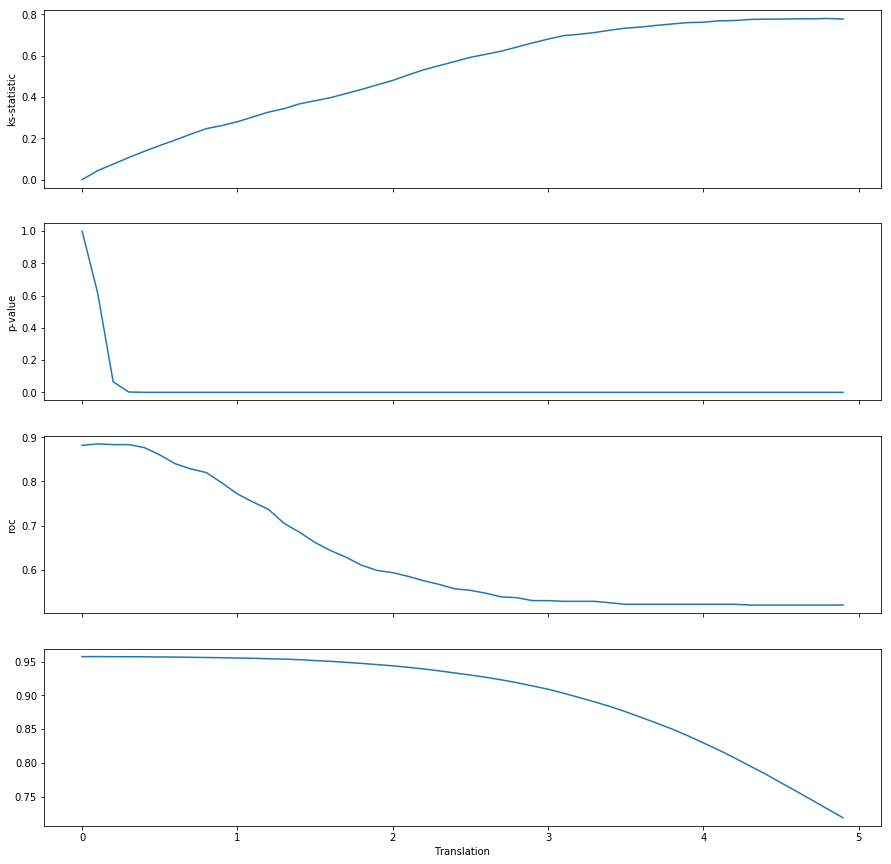

In [290]:
fig,ax = plt.subplots(nrows=4, sharex=True, figsize=(15,15))
ax[0].plot(list(results_translate.keys()), ks)
ax[3].set_xlabel('Translation')
ax[0].set_ylabel('ks-statistic')
ax[1].plot(list(results_translate.keys()), p)
ax[1].set_ylabel('p-value')
ax[2].plot(list(results_translate.keys()), acc)
ax[2].set_ylabel('accuracy')
ax[3].plot(list(results_translate.keys()), roc)
ax[2].set_ylabel('roc')

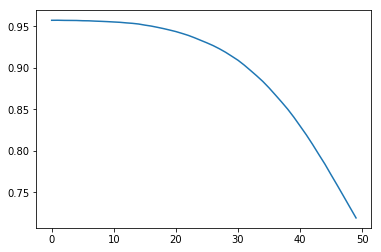

In [277]:
plt.plot(acc)

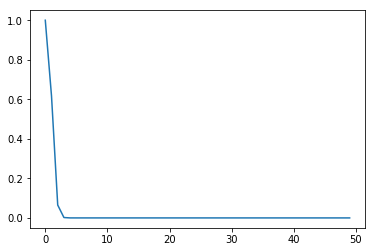

In [270]:
plt.plot(p)

In [292]:
test_trans = test.apply(lambda x: translate(np.array([x.iloc[0], x.iloc[1]]), [0,0]), axis=1, result_type='expand')
test_trans.columns = ['x1', 'x2']

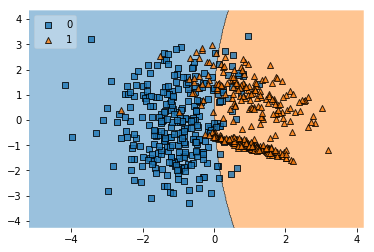

In [293]:
plot_decision_regions(test_trans[['x1', 'x2']].values, test['y'].values, clf=svc_pipe, legend=2)

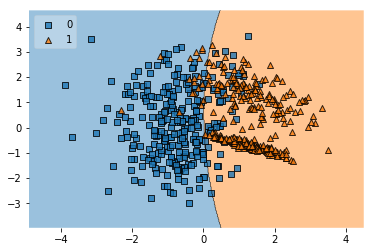

In [291]:
test_trans = test.apply(lambda x: translate(np.array([x.iloc[0], x.iloc[1]]), [0.3,0.3]), axis=1, result_type='expand')
test_trans.columns = ['x1', 'x2']
plot_decision_regions(test_trans[['x1', 'x2']].values, test['y'].values, clf=svc_pipe, legend=2)